# Neural Networks with MNIST

### In this notebook we build a neural network to predict the value of handwritten digits:
<img src="https://tensorflow.rstudio.com/tensorflow/articles/images/MNIST.png"
     alt="Image Didn't Load"
     style="float: left; margin-right: 10px;" />  
<br>
<br>
<br>
<br>
<br>
<br>



### We're going to use a network that looks like this:
![](./images/tf_vis.png)  

### Network structure
We will take in all 28 * 28 pixel values from each image (these are grayscale images so we don't have to worry about color channels). The inputs will be multiplied by the weights of each layer and put through the activation function called ReLU (Rectified Linear Unit). The output will be a probability distribution over ten numbers (0,...,9) indicating the probability that each digit is the number in the image.

![](./images/net_vis.png)

In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import tensorflow
import tensorflow as tf
# import MNIST (MNIST is a dataset containing correctly labeled images of handwritten numbers)
from tensorflow.examples.tutorials.mnist import input_data

#import pyplot for visualization
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a variable containing MNIST data
# There's more than 30,000 images here 
# Just imagine the man hours :P
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)
# Ignore the warnings :P

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Setting hyperparameters 
This is where we specify how we want our network to "look" and behave.

In [31]:
# How much of a step we take. Higher learning rates means faster learning but less stable performance
learning_rate = 0.001 

# How many images we are training on at every step. 
# Remember this is gradient descent so we are gonna take small steps of just 128 images towards the goal
batch_size = 128

# run 2000 steps
n_steps = 200

# How many neurons for each layer
n_inputs = 28 * 28 # its a 28 by 28 pixel image so input is gonna be 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_output = 10 # output is probabilities of the image being a particular number

### Placeholders
In a tensorflow graph we create placeholders which upon running the graph will contain our input and output data (i.e. images and associated digits each one represents).

In [21]:
# create placeholders
# this is where we will feed in the images and the labels
# x is where we will feed in the image
x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

# y is where we will feed in the label for the corresponding image
# i.e. if the image is a 3, y is 3
y = tf.placeholder(tf.int64, shape=None, name="y")

### Constructing the actual network
After the input layer we have three more layers: hidden layer 1, hidden layer 2, and the output layer. Here we will use tf.layers.dense(inputs, units, activation) -- <b>inputs</b> is the input to the layer, <b>units</b> is the number of nodes in that layer, and <b>activation</b> is the activation function applied in that layer (no activation if left blank). Remember that we want to use the ReLU function (https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/). 
<br>
<b>ReLU</b>:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png"
     alt="Image Didn't Load"/>

In [22]:
# create the neural network
# hidden1 layer takes in our image input (x)
# we will be using the relu activation function

hidden1_layer = tf.layers.dense(x, n_hidden1, activation=tf.nn.relu)
hidden2_layer = tf.layers.dense(hidden1_layer, n_hidden2, activation=tf.nn.relu)
output_layer = tf.layers.dense(hidden2_layer, n_output)

# if you get some weird error about reuse, restart the kernel

# for more about activation functions:
# https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

### Loss
Here we will be using cross entropy get our error which is a way to determine how close our probability distribution is to the ground truth probability distribution (i.e. a one-hot vector with the one in index corresponding to the correct digit of the related image). We then want to reduce our error over each element in the batch to one error. More on cross entropy: https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/. 

<br>
<b>Cross Entropy:</b><br>
p(x) is 0 or 1 indicating the correct "class" or not; q(x) is our predicted probability; for each x in (0,...,9)
<img src="http://4.bp.blogspot.com/-O5gRO-nJIQc/WacXCgSMdxI/AAAAAAAA6Gw/ReT-cKX0MM0BYiDXJ9JJ_WFBzcBluvgqwCK4BGAYYCw/s1600/cross%2Bentropy.png"
     alt="Image Didn't Load"/>

In [23]:
# training
# instead of using squared error like the 3Blue1Brown video, we use cross entropy error
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=output_layer)

# add up all the error with reduce_mean
loss = tf.reduce_mean(cross_entropy)

### Setting up the training operations

In [24]:
# we will use Adam Optimizer to do all the backpropagation heavy lifting for us
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# create an operator that we can call on to minimize loss
training_op = optimizer.minimize(loss)

In [25]:
# create operators for evaluating the network
with tf.name_scope("eval"):
    # correct variable is the number of correct labels
    correct = tf.nn.in_top_k(output_layer, y, 1)
    # count up the number of correct labels
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### Setting up the session and running the graph
Now that we have our data, network, hyperparameters, etc... we want to actually train the network so it outputs values that are correct. 

In [32]:
# creates a tensorflow session
# the session will keep all of our values and current state of the network
sess = tf.Session()
    
# first initialize the values in the network
tf.global_variables_initializer().run(session=sess)

for step in range(n_steps):
    # creates a batch of images and labels
    x_batch, y_batch = mnist.train.next_batch(batch_size)

    # feed in the batch of images and batch of labels
    # and run the training operator on them
    sess.run(training_op, feed_dict={x: x_batch, y: y_batch})

    # feed in the test images and the test labels (which the network has never seen)
    # and evaluate the accuracy
    accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

    if step % 50 == 0:
        print(step, "Test accuracy:", accuracy_val)




0 Test accuracy: 0.189
50 Test accuracy: 0.8958
100 Test accuracy: 0.9249
150 Test accuracy: 0.937


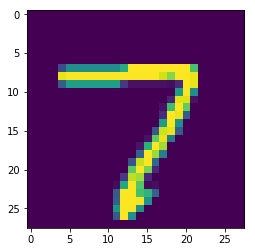

In [47]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

#get visualization
image = mnist.train.next_batch(1)[0]
plt.imshow(np.reshape(image, (28, 28)))

[9.2036906e-05 5.9247399e-05 4.0936747e-04 6.6588619e-03 3.8132450e-06
 1.5065038e-04 3.9823124e-07 9.8992854e-01 9.8589226e-05 2.5985767e-03]


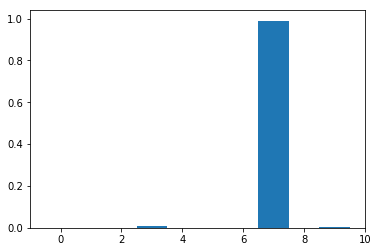

In [48]:
#show bar plot of probabilites
probs = softmax(sess.run(output_layer, feed_dict={x: image})[0])
print(probs)
x_pos = [i for i, _ in enumerate(probs)]
plt.bar(x_pos, probs, 1)
plt.show()

In [ ]:
#close session
sess.close()